In [18]:
import polars as pl
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
# Path to the Parquet file
file_path = r"D:\20241207_week5_products_uav_data\output\extract\20241207_week5_project_12_IMG_0012_6.tif.parquet"

# Load the Parquet file into a Polars DataFrame
df = pl.read_parquet(file_path)

# Display the first few rowsSS
xcam = float(df[["xcam"][0]][0])
ycam = float(df[["ycam"][0]][0])
zcam = float(df[["delta_z"][0]][0]+df[["elev"][0]][0])

df


Xw,Yw,band1,band2,band3,band4,band5,elev,plot_id,delta_z,delta_x,delta_y,distance_xy,angle_rad,vza,vaa_rad,vaa_temp,vaa,xcam,ycam,sunelev,saa,path
f64,f64,f32,f32,f32,f32,f32,f32,str,f32,f64,f64,f64,f32,f32,f64,f64,f64,f32,f32,f32,f32,str
563632.195878,5.7130e6,NaN,NaN,NaN,NaN,NaN,187.88269,"""plot_8""",19.67897,14.366622,-5.13504,15.256752,0.91131,37.790001,1.914074,-61.123651,298.876349,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563632.203182,5.7130e6,NaN,NaN,NaN,NaN,NaN,187.877213,"""plot_8""",19.684448,14.359318,-5.135132,15.249905,0.911662,37.77,1.91424,-61.11409,298.88591,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563632.210486,5.7130e6,NaN,NaN,NaN,NaN,NaN,null,"""plot_8""",19.703262,14.352014,-5.135224,15.243058,0.912342,37.73,1.914407,-61.104521,298.895479,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563632.21779,5.7130e6,NaN,NaN,NaN,NaN,NaN,null,"""plot_8""",19.723648,14.34471,-5.135316,15.236212,0.91306,37.689999,1.914575,-61.094943,298.905057,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563632.225094,5.7130e6,NaN,NaN,NaN,NaN,NaN,null,"""plot_8""",19.726639,14.337406,-5.135407,15.229367,0.91335,37.669998,1.914742,-61.085356,298.914644,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
563633.867331,5.7130e6,0.012702,0.037408,0.015113,0.109692,0.3802,187.993378,"""plot_10""",19.568283,12.695169,-8.742923,15.414474,0.903584,38.23,2.173885,-46.237539,313.762461,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563633.874635,5.7130e6,0.012207,0.037203,0.014488,0.1003,0.365892,187.997192,"""plot_10""",19.564468,12.687865,-8.743015,15.408511,0.903677,38.220001,2.174159,-46.221854,313.778146,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""
563633.881939,5.7130e6,0.012204,0.035652,0.015033,0.092907,0.361171,188.00148,"""plot_10""",19.560181,12.680561,-8.743106,15.402549,0.903758,38.220001,2.174433,-46.206156,313.793844,563646.5625,5.713029e6,58.715553,170.791992,"""IMG_0012_6.tif"""


(563631.3690563123, 563647.2859973185, 5713028.331654578, 5713043.0352538545)

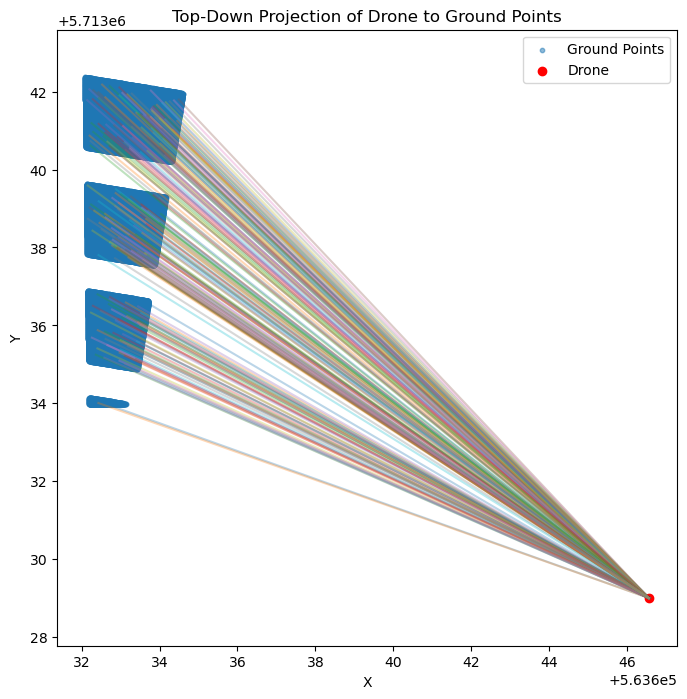

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df["Xw"], df["Yw"], s=10, alpha=0.5, label="Ground Points")
plt.scatter([xcam], [ycam], c='red', label="Drone")

# Draw view vectors
for i in range(0, len(df), 1000):  # Use step to avoid clutter
    plt.plot([xcam, df["Xw"][i]], [ycam, df["Yw"][i]], alpha=0.3)

plt.legend()
plt.title("Top-Down Projection of Drone to Ground Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")


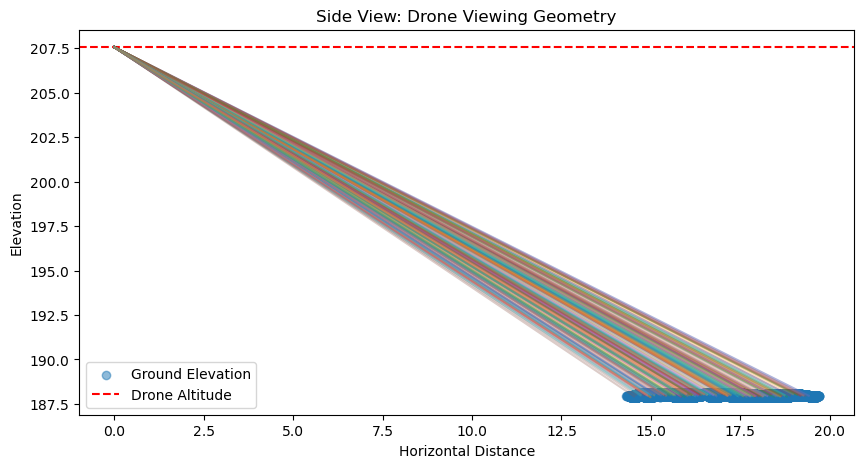

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(df["distance_xy"], df["elev"], label="Ground Elevation", alpha=0.5)
plt.axhline(zcam, color='red', linestyle='--', label="Drone Altitude")

for i in range(0, len(df), 1000):
    plt.plot([0, df["distance_xy"][i]], [zcam, df["elev"][i]], alpha=0.3)

plt.xlabel("Horizontal Distance")
plt.ylabel("Elevation")
plt.title("Side View: Drone Viewing Geometry")
plt.legend()


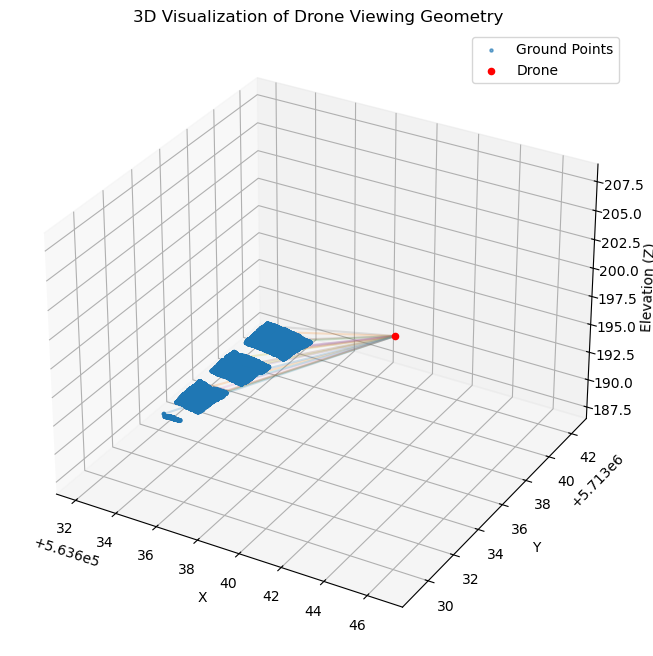

In [21]:
from mpl_toolkits.mplot3d import Axes3D
plt.ion()  # Enable interactive mode

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ground points
ax.scatter(df["Xw"], df["Yw"], df["elev"], s=5, alpha=0.6, label="Ground Points")

# Drone position
ax.scatter([xcam], [ycam], [zcam], c='red', label="Drone")

# Viewing rays
for i in range(0, len(df), 10000):
    ax.plot(
        [xcam, df["Xw"][i]],
        [ycam, df["Yw"][i]],
        [zcam, df["elev"][i]],
        alpha=0.2
    )

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (Z)")
ax.set_title("3D Visualization of Drone Viewing Geometry")
ax.legend()


(0.0, 45.150001525878906)

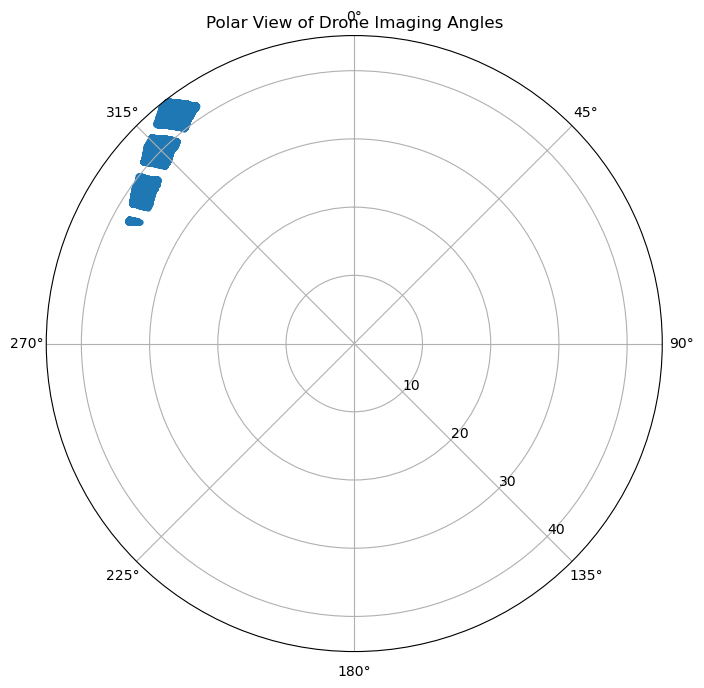

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Convert angles to radians if needed
theta = np.deg2rad(df["vaa"])  # Azimuth angle in radians
r = df["vza"]  # Radial: zenith angle

ax.scatter(theta, r, s=10, alpha=0.6)

ax.set_theta_zero_location("N")  # 0° at the top (North)
ax.set_theta_direction(-1)       # Clockwise direction (East = 90°)
ax.set_title("Polar View of Drone Imaging Angles")

ax.set_rlabel_position(135)  # Move radial labels to a readable spot
ax.set_rlim(0, max(r))       # Optional: set max radial limit


In [24]:
import plotly.express as px

# Sample a subset for performance
df_sub = df.sample(n=50000)

# Create 3D scatter plot
fig = px.scatter_3d(
    df_sub,
    x="Xw", y="Yw", z="elev",
    color="vza",  # Optional: color by view zenith angle or any other variable
    title="3D Drone Ground Projection (Top-Down Perspective)",
    labels={"Xw": "X", "Yw": "Y", "elev": "Elevation"}
)

# Add drone point manually
fig.add_scatter3d(
    x=[xcam], y=[ycam], z=[zcam],
    mode='markers',
    marker=dict(size=5, color='red'),
    name="Drone"
)

fig.update_layout(
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z (Elevation)"
    ),
    height=800,
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()
